In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

titanic = titanic.drop(columns=['Name']) # drop the column 'Name'
is_F = (titanic['Sex']=='female') # array of True and False
titanic['Sex'] = is_F.astype(int) # 1 = female, 0 = male
train = titanic.sample(frac=0.8) # 80% rows for training
test = titanic.drop(index=train.index)

y_train = train['Survived']
X_train = train.drop(columns=['Survived'])
print(X_train.shape, y_train.shape)

y_test = test['Survived']
X_test = test.drop(columns=['Survived']) 
print(X_test.shape, y_test.shape)

(710, 6) (710,)
(177, 6) (177,)


In [3]:
from sklearn import tree

T = tree.DecisionTreeClassifier(max_depth=2)

T.fit(X_train, y_train)

print('max_depth 2')
print('Train score:',T.score(X_train, y_train))
print('Test score:',T.score(X_test, y_test))

max_depth 2
Train score: 0.7901408450704225
Test score: 0.8022598870056498


# Visualizing decision tree classifier

## Default approach

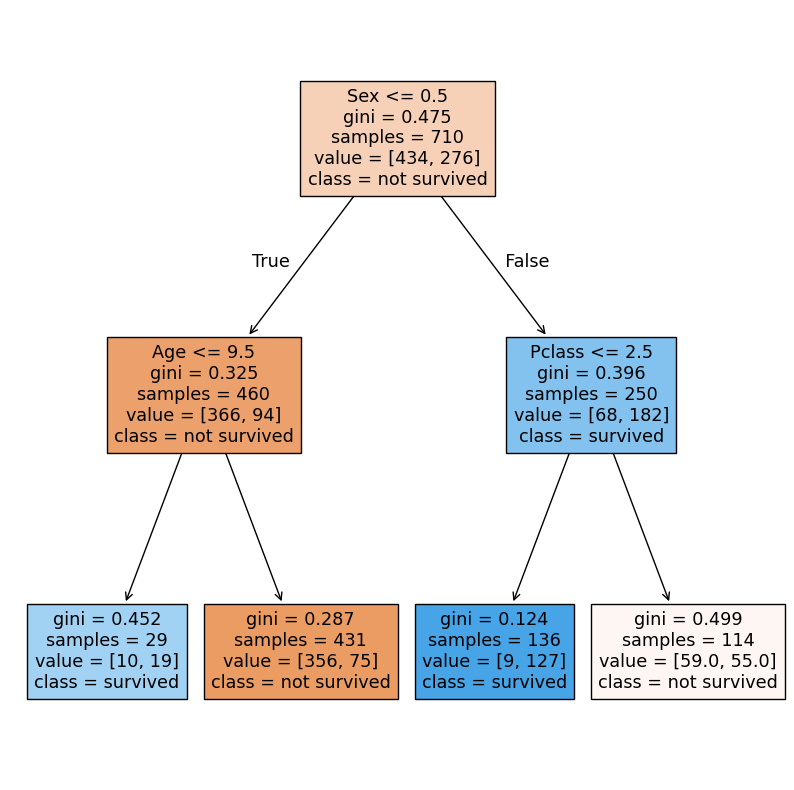

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree(T, 
                   filled=True, 
                   feature_names=X_train.columns,
                  class_names=['not survived', 'survived'])

In [5]:
# and this is what p is... it's a list of the text in the boxes!
p

[Text(0.5, 0.8333333333333334, 'Sex <= 0.5\ngini = 0.475\nsamples = 710\nvalue = [434, 276]\nclass = not survived'),
 Text(0.25, 0.5, 'Age <= 9.5\ngini = 0.325\nsamples = 460\nvalue = [366, 94]\nclass = not survived'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.452\nsamples = 29\nvalue = [10, 19]\nclass = survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.287\nsamples = 431\nvalue = [356, 75]\nclass = not survived'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.396\nsamples = 250\nvalue = [68, 182]\nclass = survived'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.124\nsamples = 136\nvalue = [9, 127]\nclass = survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.499\nsamples = 114\nvalue = [59.0, 55.0]\nclass = not survived')]

## Getting rid of gini, samples, and value

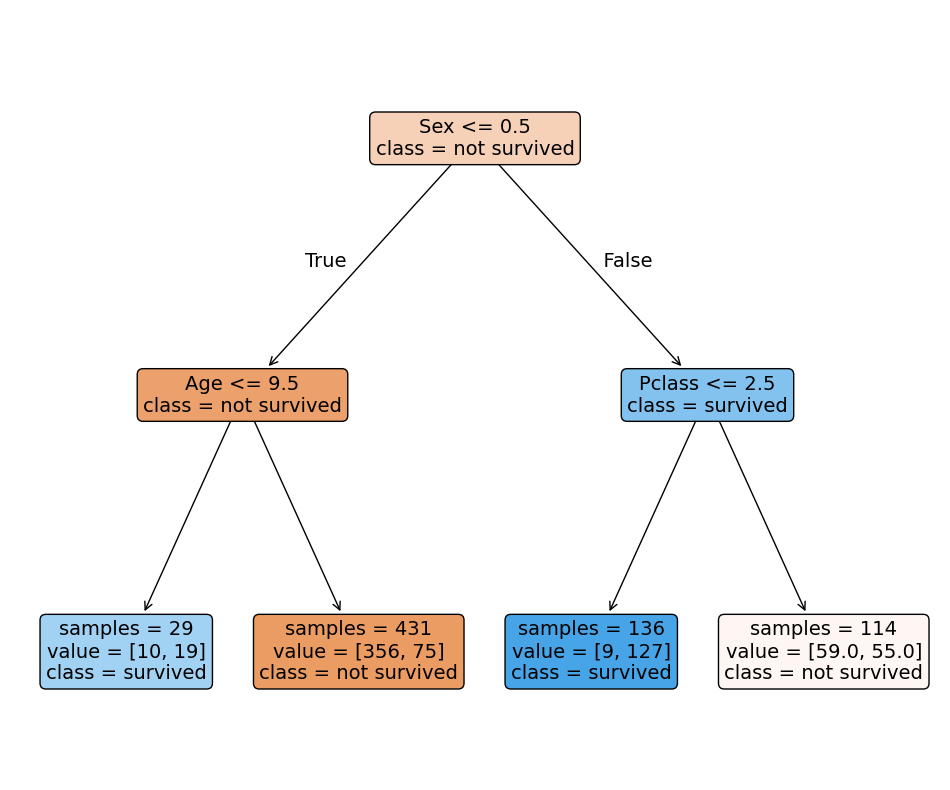

In [6]:
fig, ax = plt.subplots(1, figsize = (12, 10)) # if you want to modify figsize
p = tree.plot_tree(T, ax = ax,
                   filled=True, 
                   impurity=False, # Add this line
                   fontsize=14, # If you want to modify font size
                   rounded=True,
                   feature_names=X_train.columns,
                  class_names=['not survived', 'survived'])

#### Copy paste this section
import re
import matplotlib as mpl

def replace_text(obj):
    if type(obj) == mpl.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class","\nclass",txt)
        obj.set_text(txt)
    return obj
    
ax.properties()['children'] = [replace_text(i) for i in p]
fig.show()
####

## Want to replace text yourself?

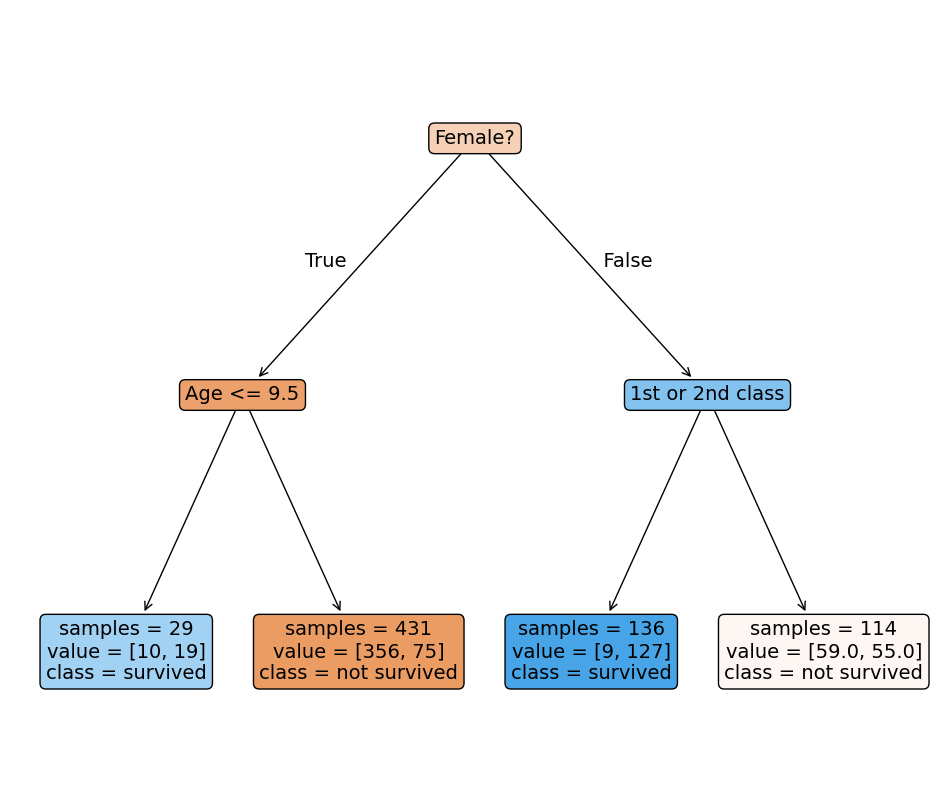

In [7]:
fig, ax = plt.subplots(1, figsize = (12, 10)) 
p = tree.plot_tree(T, ax = ax,
                   filled=True, 
                   impurity=False, 
                   fontsize=14, 
                   rounded = True,
                   feature_names=X_train.columns,
                  class_names=['not survived', 'survived'])

import re
import matplotlib as mpl

def replace_text(obj):
    if type(obj) == mpl.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class","\nclass",txt)
        obj.set_text(txt)
    return obj

ax.properties()['children'] = [replace_text(i) for i in p]
#### This line is now customized
ax.properties()['children'] = [p[0].set_text('Female?'), 
                               p[1].set_text('Age <= 9.5'),
                              p[5].set_text('1st or 2nd class')]
fig.show()
####